# Probability Distributions

When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. 

A **probability distribution** describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely on a scale from 0 (the event never occurs) to 1 (the event always occurs). 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random

## 1. The Uniform Distribution

The uniform distribution is a probability distribution where each value within a certain range is **equally likely to occur** and values outside of the range never occur.

<img src = "https://i.ytimg.com/vi/UC-CBUSQXAo/maxresdefault.jpg" alt="Uniform Distribution" width="500">

In [2]:
help(stats.uniform.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.uniform_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : None or int or ``np.random.RandomState`` instance, optional
        If int or RandomState, use it for drawing the random variates.
        If None, rely on ``self.random_state``.
        Default is None.
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.



`stats.distribution.rvs()` generates random numbers from the specified distribution. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


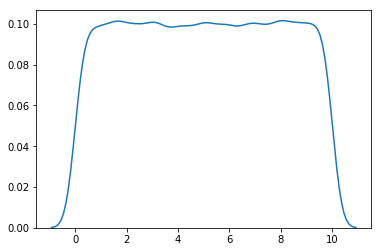

In [3]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10

sns.kdeplot(uniform_data);

#### Cumulative Distribution Function (CDF)
<img src="https://miro.medium.com/v2/resize:fit:1358/0*GVMTk0rK2VOHslEV.png" alt="Cumulative Distribution Function (CDF)" width="500">

- `stats.distribution.cdf()` is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function)). 
- In essence, `cdf()` gives you the area under the distribution's density curve to the left of a certain value on the x axis. 
- For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. 

In [4]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

- `stats.distribution.ppf()` is the inverse of `cdf()`: it returns the x axis cutoff value (quantile) associated with a given probability. 
- For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value.

In [5]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

- `stats.distribution.pdf()` gives you the probability density (height of the distribution) at a given x value. 
- Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0.

In [6]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


In [7]:
from scipy.stats import skew, kurtosis

mean_value = uniform_data.mean()
variance_value = uniform_data.var()
skewness_value = skew(uniform_data)
kurtosis_value = kurtosis(uniform_data)

print("Mean:", mean_value)
print("Variance:", variance_value)
print("Skewness:", skewness_value)
print("Kurtosis:", kurtosis_value)

Mean: 5.013689580503001
Variance: 8.335418353863467
Skewness: -0.002779621212329232
Kurtosis: -1.2035487909493283


Probability distribution functions in scipy also support median(), mean(), var() and std().

In [8]:
mean, variance, skewness, kurtosis = stats.uniform.stats(moments='mvsk')

print("Mean:", mean)
print("Variance:", variance)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 0.5
Variance: 0.08333333333333333
Skewness: 0.0
Kurtosis: -1.2


#### Generating Random Numbers and Setting The Seed

Python also comes with a library called "random" that lets you perform various operations that involve randomization. 

In [9]:
# Get a random integer in the specified range
print('Integer random number: ',random.randint(0,10)  )

# Get a real number between 0 and 1
print('Real random number: ',random.random()) 

# Get a random element from a sequence
print('return random number from list: ',random.choice([2,4,6,9])) 

# Get a real in the specified range
print('return random number from range: ', random.uniform(0,10))

Integer random number:  0
Real random number:  0.9476048108533511
return random number from list:  9
return random number from range:  1.5546310470836155


**Generated the exact same numbers using `random.seed()`**

In [10]:
random.seed(12)  # Set the seed to an arbitrary value
print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # Set the seed to the same value
print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


---
## 2. The Normal Distribution

Many real world phenomena, like IQ test scores and human heights, so it is often used to model random variables. Many common statistical tests assume distributions are normal.
- A normal distribution is defined by its center (mean) and spread (standard deviation). 
- The distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

<img src="https://media.licdn.com/dms/image/D5612AQG8zrJjcL54ZQ/article-cover_image-shrink_720_1280/0/1677870809878?e=2147483647&v=beta&t=b7PE_5vElyBGzVwADb7Z14OoDni_vutH3IlMdmVH6JM" alt="Normal distribution" width="500">

In [11]:
prob_under_minus1 = stats.norm.cdf(x= -1,   # Cutoff value (quantile) to check
                                loc = 0,    # Mean = 0           
                                scale= 1)   # std = 1 

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:

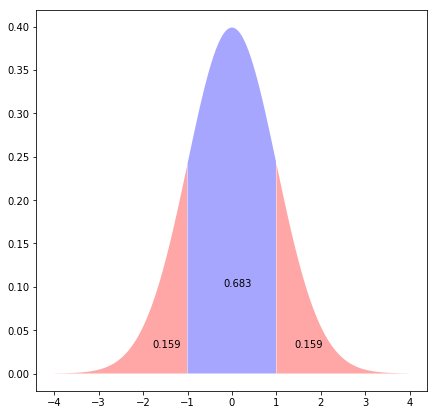

In [12]:
# Plot normal distribution areas*
plt.rcParams["figure.figsize"] = (7,7)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

In [13]:
print( stats.norm.ppf(q=0.16) ) # Find the quantile for the 16% cutoff
print( stats.norm.ppf(q=0.84) ) # Find the quantile for the (100-16)=84% cutoff

-0.994457883209753
0.994457883209753


> **The quantile output above confirms that roughly 68% of the data lies between -1 to 1 standard deviations from the mean.**

In [14]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff
print( stats.norm.ppf(q=0.975) ) # Find the quantile for the (100-2.5)=97.5% cutoff

-1.9599639845400545
1.959963984540054


> **The quantile output above confirms that roughly 95% of the data lies between -2 (-1.96) to 2 (+1.96) standard deviations from the mean.**

In [15]:
print( stats.norm.ppf(q=0.0015) ) # Find the quantile for the 0.15% cutoff
print( stats.norm.ppf(q=0.9985) ) # Find the quantile for the (100-0.15)=99.85% cutoff

-2.9677379253417833
2.9677379253417944


> **The quantile output above confirms that roughly 99.7% of the data lies between -3 (-2.96) to 3 (+2.96) standard deviations from the mean.**

---
## The Binomial Distribution

The [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) is a **discrete** probability distribution that models the outcomes of a given number of random trails of some experiment or event. 
- The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. 
- The binomial distribution tells you **how likely it is to achieve a given number of successes** in **n** trials of the experiment. 
- For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

In [16]:
# عملت 10000 تجربه ف كل مره كنت بعمل ملك وكتابه 10 مرات واعد طلع الملك كام مره 
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials
fair_coin_flips, len(fair_coin_flips)

(array([5, 6, 4, ..., 5, 5, 6]), 10000)

In [17]:
pd.crosstab(index='counts', columns=fair_coin_flips)

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
counts,7,111,419,1188,2057,2440,2087,1174,407,106,4


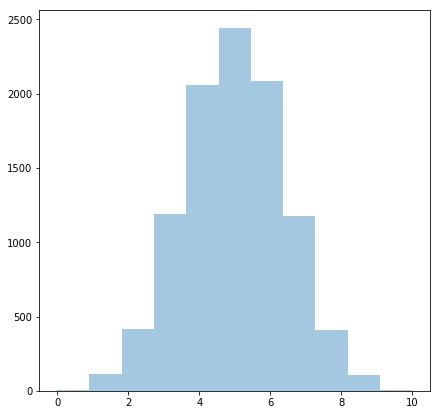

In [18]:
sns.distplot(fair_coin_flips, bins=11, kde=False)

- The binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. 
- The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution.
- If we alter the success probability, the distribution won't be symmetric.

col_0,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,
counts,2,6,58,250,854,1998,3089,2639,1104


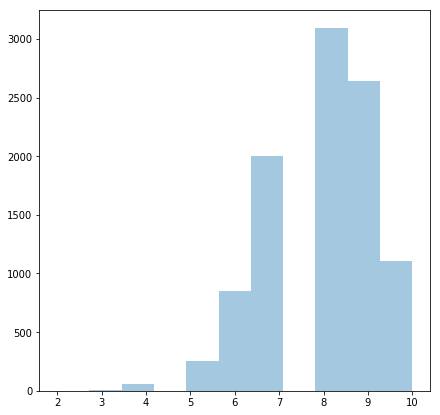

In [19]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials


# Plot histogram
sns.distplot(biased_coin_flips, bins=11, kde=False)

# Print table of counts
pd.crosstab(index="counts", columns= biased_coin_flips)

The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [20]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

In [21]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000003

- For **continuous** distributions like the normal, we use `pdf()` (probability density functions) to check the probability density at a given x value. 
- For **discrete** distributions like the binomial, we use `pmf()` (probability mass function) to check the mass (proportion of observations) at given number of successes k.

In [22]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000025

In [23]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.301989888

---
## 4. Geometric Distributions
The geometric and exponential distributions model the time it takes for an event to occur. The [geometric](https://www.youtube.com/watch?v=o5N8ZeMQZxY) distribution is discrete and models the number of **trials it takes to achieve a success** in repeated experiments with a given probability of success. ايه احتماليه ان النجاح يحصل بعد 5 تجارب مثلاوبالتالي التجارب دي هي ال random varaible

In [24]:

set(stats.geom.rvs(size=10000, p=0.5))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14}

col_0,1,2,3,4,5,6,7,8,9,10,11,12,13
row_0,,,,,,,,,,,,,
counts,5072,2509,1215,606,301,138,83,39,18,12,5,1,1


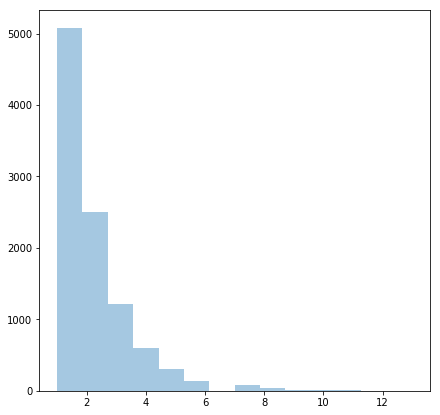

In [25]:
import random
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Plot histogram
sns.distplot(flips_till_heads, bins=max(flips_till_heads)+1, kde=False)

# Print table of counts
pd.crosstab(index="counts", columns= flips_till_heads)

##### The distribution is very likely to get a heads in 1 or 2 flips, while it is very unlikely for it to take more than 5 flips to get a heads. In the 10,000 trails we generated, the longest it took to get a heads was 13 flips.

In [26]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

In [27]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

---
## 5. Exponential Distributions
The exponential distribution is a continuous analog of the geometric distribution and models **the amount of time** you have to wait before an event occurs given a certain occurrence rate.

In [28]:
# Get the probability of waiting more than 1 time unit before a success
prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

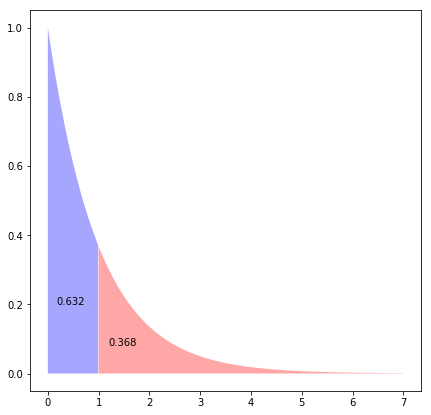

In [29]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.text(x=0.17, y=0.2, s= round(prob_1,3))
plt.text(x=1.2, y=0.08, s= round(1 - prob_1,3));

#### Similar to the geometric distribution, the exponential starts high and has a long tail that trails off to the right that contains rare cases where you have to wait much longer than average for an arrival.

---
## 5. Poisson Distribution

The Poisson distribution models the probability of seeing a certain number of successes within a time interval.
- The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
counts,3713,3694,1779,617,163,28,6


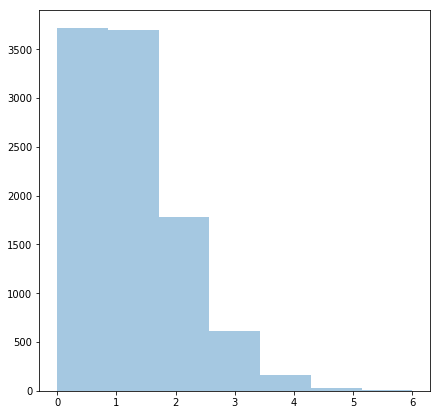

In [30]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1 (lambda)

# Plot histogram
sns.distplot(arrival_rate_1, kde=False, bins=max(arrival_rate_1)+1)

# Print table of counts
pd.crosstab(index="counts", columns= arrival_rate_1)

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

col_0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,26
row_0,,,,,,,,,,,,,,,,,,,,,,,,
counts,1,32,72,203,362,623,877,1153,1229,1247,1124,994,710,543,313,231,138,74,41,14,11,5,2,1


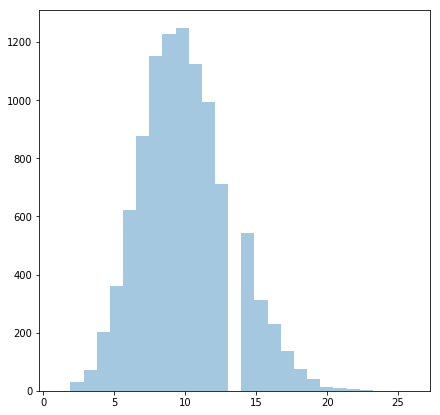

In [31]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10
# Plot histogram
sns.distplot(arrival_rate_10, kde=False, bins=max(arrival_rate_10)+1)

# Print table of counts
pd.crosstab(index="counts", columns= arrival_rate_10)

In [32]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [33]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

## Wrap Up

- Python's scipy library contains functions that make it easy to work with a wide range of probability distributions, including [many that we did not discuss](https://docs.scipy.org/doc/scipy/reference/stats.html) in this lesson. 
- Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.